In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../content/drive/MyDrive/machine learning/insurance.csv")

data.info()

for column in ['sex', 'smoker', 'region']:
    data[column] = data[column].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: catego

In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data.describe(include='category', exclude='float')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1810772880>,
      dtype=object)

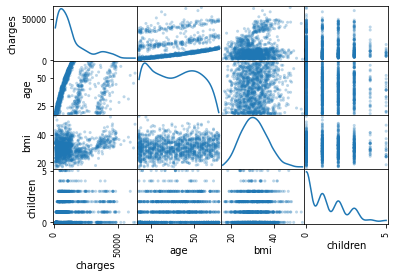

In [5]:
from pandas.plotting import scatter_matrix

scatter_matrix(data[['charges','age','bmi', 'children']], alpha=0.3, diagonal='kde')

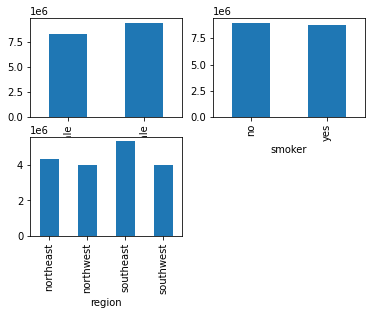

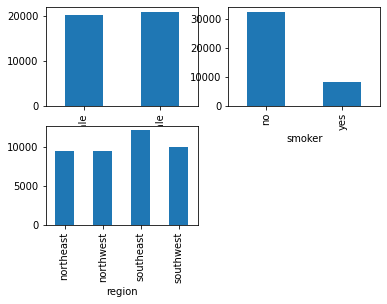

In [6]:
plt.figure(1)
plt.subplot(2,2,1)
data.groupby(['sex'])['charges'].sum().plot.bar()
plt.subplot(2,2,2)
data.groupby(['smoker'])['charges'].sum().plot.bar()
plt.subplot(2,2,3)
data.groupby(['region'])['charges'].sum().plot.bar()

plt.figure(2)
plt.subplot(2,2,1)
data.groupby(['sex'])['bmi'].sum().plot.bar()
plt.subplot(2,2,2)
data.groupby(['smoker'])['bmi'].sum().plot.bar()
plt.subplot(2,2,3)
data.groupby(['region'])['bmi'].sum().plot.bar()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

numerical = ['age','bmi', 'children']
categorical = ['sex', 'smoker', 'region']
X_train, X_test, y_train, y_test = train_test_split(data[numerical], 
                                                    data['charges'], 
                                                    test_size=0.2,
                                                   random_state=42)

In [8]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [9]:
print("The mean squared error is {:.2f}".format(mean_squared_error(y_test,y_pred)))
print("R2-score: {:.2f}".format(r2_score(y_test,y_pred)))

The mean squared error is 131201335.65
R2-score: 0.15


Feature: age
Mean squared error: 135983957.48
R2-score: 0.12


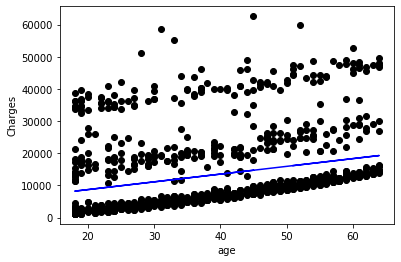

Feature: bmi
Mean squared error: 149085057.04
R2-score: 0.04


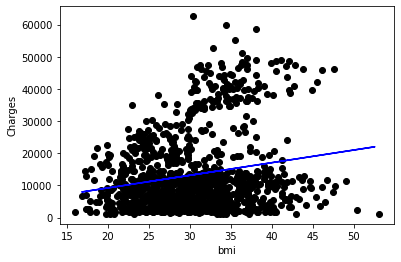

Feature: children
Mean squared error: 154985513.03
R2-score: 0.00


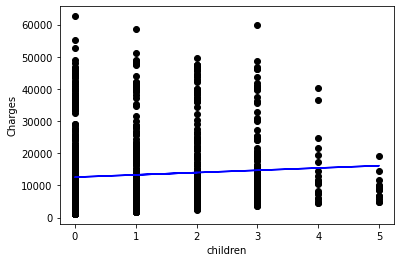

In [10]:
for feature in numerical:
    X_train, X_test, y_train, y_test = train_test_split(data[feature].values.reshape(-1,1),
                                                       data['charges'],
                                                       test_size=0.2,
                                                       random_state=42)
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    print("Feature: {}".format(feature))
    print("Mean squared error: {:.2f}".format(mean_squared_error(y_test,y_pred)))
    print("R2-score: {:.2f}".format(r2_score(y_test,y_pred)))
    plt.scatter(X_train,y_train, color='black')
    plt.plot(X_test,y_pred, color='blue')
    plt.ylabel('Charges')
    plt.xlabel(feature)
    plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data[numerical[0]].values.reshape(-1,1),
                                                       data['charges'],
                                                       test_size=0.2,
                                                       random_state=42)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print("Features: {}".format(numerical[0]))
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test,y_pred)))
print("R2-score: {:.2f}".format(r2_score(y_test,y_pred)))
for i in range(2,4):
    X_train, X_test, y_train, y_test = train_test_split(data[numerical[0:i]],
                                                       data['charges'],
                                                       test_size=0.2,
                                                       random_state=42)
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    print("Features: {}".format(numerical[0:i]))
    print("Mean squared error: {:.2f}".format(mean_squared_error(y_test,y_pred)))
    print("R2-score: {:.2f}".format(r2_score(y_test,y_pred)))

Features: age
Mean squared error: 135983957.48
R2-score: 0.12
Features: ['age', 'bmi']
Mean squared error: 131440262.76
R2-score: 0.15
Features: ['age', 'bmi', 'children']
Mean squared error: 131201335.65
R2-score: 0.15


In [12]:
data = pd.get_dummies(data)
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [13]:
features = list(data.columns)
features.remove('charges')

r2_scores = []

X_train, X_test, y_train, y_test = train_test_split(data[features[0]].values.reshape(-1,1),
                                                       data['charges'],
                                                       test_size=0.2,
                                                       random_state=42)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print("Feature added: {}. Total features: {}".format(features[0],len(features[0:1])))
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test,y_pred)))
print("R2-score: {:.2f}".format(r2_score(y_test,y_pred)))
r2_scores.append(r2_score(y_test,y_pred))
for i in range(2,11):
    X_train, X_test, y_train, y_test = train_test_split(data[features[0:i]],
                                                       data['charges'],
                                                       test_size=0.2,
                                                       random_state=42)
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    print("Feature addes: {}. Total features: {}".format(features[i],len(features[0:i])))
    print("Mean squared error: {:.2f}".format(mean_squared_error(y_test,y_pred)))
    print("R2-score: {:.2f}".format(r2_score(y_test,y_pred)))
    r2_scores.append(r2_score(y_test,y_pred))

Feature added: age. Total features: 1
Mean squared error: 135983957.48
R2-score: 0.12
Feature addes: children. Total features: 2
Mean squared error: 131440262.76
R2-score: 0.15
Feature addes: sex_female. Total features: 3
Mean squared error: 131201335.65
R2-score: 0.15
Feature addes: sex_male. Total features: 4
Mean squared error: 130820026.09
R2-score: 0.16
Feature addes: smoker_no. Total features: 5
Mean squared error: 130820026.09
R2-score: 0.16
Feature addes: smoker_yes. Total features: 6
Mean squared error: 33979257.05
R2-score: 0.78
Feature addes: region_northeast. Total features: 7
Mean squared error: 33979257.05
R2-score: 0.78
Feature addes: region_northwest. Total features: 8
Mean squared error: 33739144.95
R2-score: 0.78
Feature addes: region_southeast. Total features: 9
Mean squared error: 33555607.10
R2-score: 0.78
Feature addes: region_southwest. Total features: 10
Mean squared error: 33596915.85
R2-score: 0.78


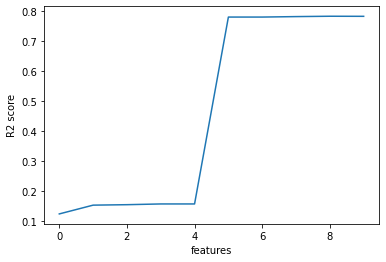

In [14]:
plt.plot(list(range(0,10)),r2_scores)
plt.ylabel('R2 score')
plt.xlabel('features')
plt.show()

In [16]:
best = ['age','bmi','sex_male','sex_female','smoker_yes', 'smoker_no']
X_train, X_test, y_train, y_test = train_test_split(data[best],
                                                   data['charges'],
                                                   test_size=0.2,
                                                   random_state=42)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

print("Mean squared error: {:.2f}".format(mean_squared_error(y_test,y_pred)))
print("R2-score: {:.2f}".format(r2_score(y_test,y_pred)))

Mean squared error: 34515553.67
R2-score: 0.78
